In [3]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
training_data = pd.read_csv('twitter_training.csv',header = None)
validation_data = pd.read_csv('twitter_validation.csv',header = None)

In [ ]:
training_data.head()

,0,1,2,3
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


In [ ]:
validation_data.head()

,0,1,2,3
0,3364,Facebook,Irrelevant,I mentioned on Facebook that I was struggling ...
1,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
2,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
3,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
4,4433,Google,Neutral,Now the President is slapping Americans in the...


In [11]:
training_data.columns=['id','info','type','text']
validation_data.columns=['id','info','type','text']

In [6]:
training_data_df = training_data
validation_data_df = validation_data

In [7]:
import re

In [12]:
training_data_df['lower']=training_data_df.text.str.lower()
training_data_df['lower']=[str(data) for data in training_data_df.lower]
training_data_df['lower']=training_data_df.lower.apply(lambda a: re.sub('[^A-Za-z0-9]+',' ',a))
training_data_df.head()

,id,info,type,text,lower
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...,i am coming to the borders and i will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...,im getting on borderlands 2 and i will murder ...


In [14]:
validation_data_df['lower']=validation_data_df.text.str.lower()
validation_data_df['lower']=[str(data) for data in validation_data_df.lower]
validation_data_df['lower']=validation_data_df.lower.apply(lambda a: re.sub('[^A-Za-z0-9]+',' ',a))
validation_data_df.head()

,id,info,type,text,lower
0,3364,Facebook,Irrelevant,I mentioned on Facebook that I was struggling ...,i mentioned on facebook that i was struggling ...
1,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...,bbc news amazon boss jeff bezos rejects claims...
2,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...,microsoft why do i pay for word when it funct...
3,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,...",csgo matchmaking is so full of closet hacking ...
4,4433,Google,Neutral,Now the President is slapping Americans in the...,now the president is slapping americans in the...


In [16]:
import seaborn as sns

Text(0, 0.5, 'Number of tweets')

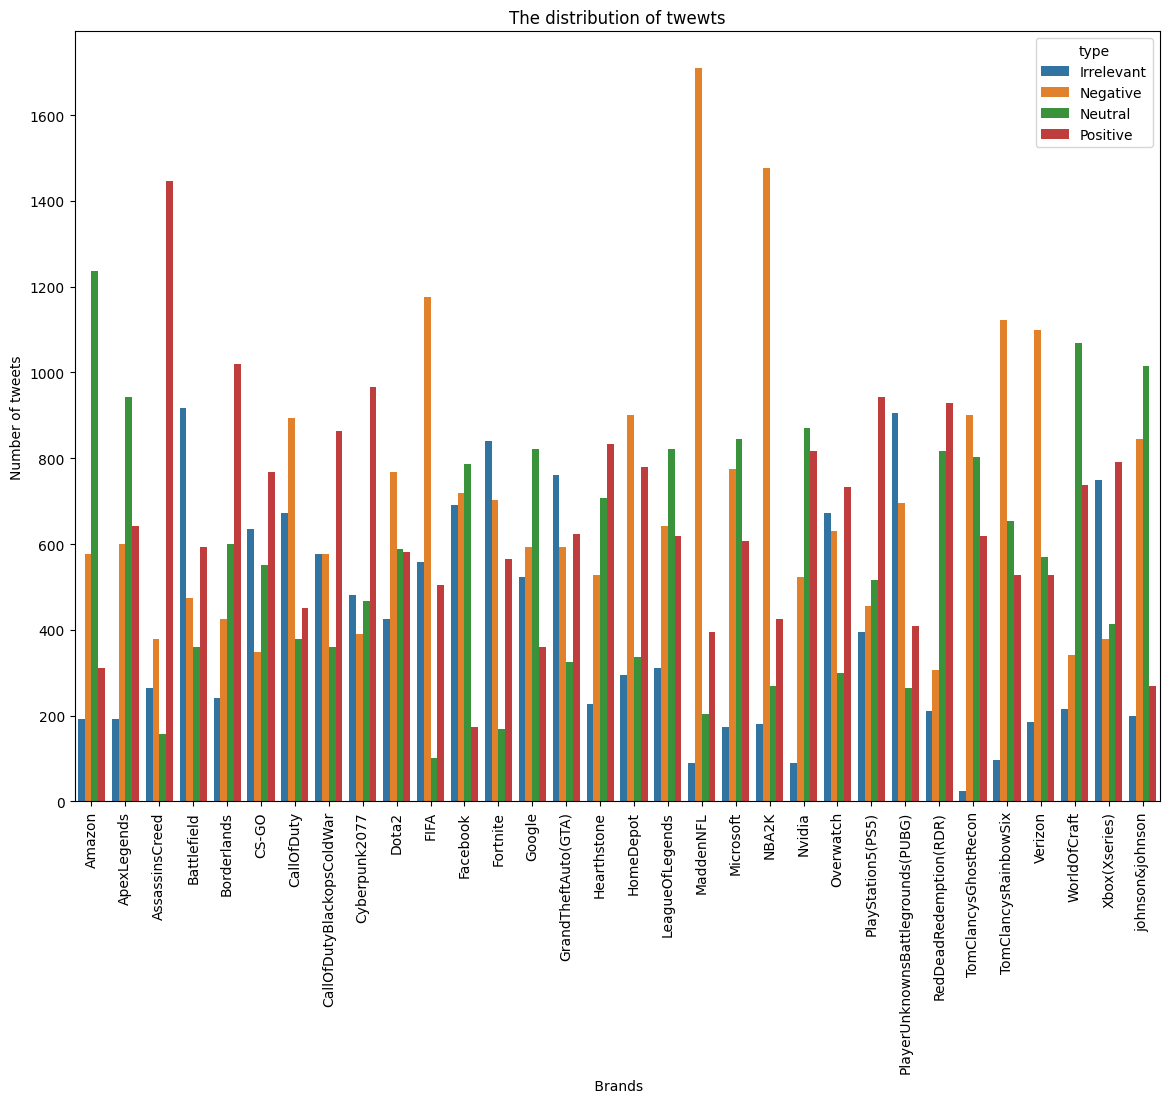

In [18]:
Information=training_data.groupby(by=["info","type"]).count().reset_index()
plt.figure(figsize=(14,10))
sns.barplot(data=Information, x='info', y='id', hue='type')
plt.title('The distribution of twewts')
plt.xticks(rotation=90)
plt.xlabel(' Brands')
plt.ylabel('Number of tweets')


In [22]:
from nltk import word_tokenize
import nltk

In [24]:
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [25]:
tokenize = [word_tokenize(str(word)) for word in validation_data_df.lower]
tokenize

[['i',
  'mentioned',
  'on',
  'facebook',
  'that',
  'i',
  'was',
  'struggling',
  'for',
  'motivation',
  'to',
  'go',
  'for',
  'a',
  'run',
  'the',
  'other',
  'day',
  'which',
  'has',
  'been',
  'translated',
  'by',
  'tom',
  's',
  'great',
  'auntie',
  'as',
  'hayley',
  'can',
  't',
  'get',
  'out',
  'of',
  'bed',
  'and',
  'told',
  'to',
  'his',
  'grandma',
  'who',
  'now',
  'thinks',
  'i',
  'm',
  'a',
  'lazy',
  'terrible',
  'person'],
 ['bbc',
  'news',
  'amazon',
  'boss',
  'jeff',
  'bezos',
  'rejects',
  'claims',
  'company',
  'acted',
  'like',
  'a',
  'drug',
  'dealer',
  'bbc',
  'co',
  'uk',
  'news',
  'av',
  'busine'],
 ['microsoft',
  'why',
  'do',
  'i',
  'pay',
  'for',
  'word',
  'when',
  'it',
  'functions',
  'so',
  'poorly',
  'on',
  'my',
  'samsungus',
  'chromebook'],
 ['csgo',
  'matchmaking',
  'is',
  'so',
  'full',
  'of',
  'closet',
  'hacking',
  'it',
  's',
  'a',
  'truly',
  'awful',
  'game'],
 ['

In [27]:
stopwrds = nltk.corpus.stopwords
stop_words = stopwrds.words('english')
stop_words

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [28]:
from sklearn.feature_extraction.text import CountVectorizer


In [29]:
bow_counts=CountVectorizer(tokenizer=word_tokenize,stop_words=stop_words,ngram_range=(1,1))
bow_counts

CountVectorizer(stop_words=['i', 'me', 'my', 'myself', 'we', 'our', 'ours',
                            'ourselves', 'you', "you're", "you've", "you'll",
                            "you'd", 'your', 'yours', 'yourself', 'yourselves',
                            'he', 'him', 'his', 'himself', 'she', "she's",
                            'her', 'hers', 'herself', 'it', "it's", 'its',
                            'itself', ...],
                tokenizer=<function word_tokenize at 0x7d96f6bf6830>)

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
train,test=train_test_split(training_data_df,test_size=0.2,random_state=42)
x_train_bow = bow_counts.fit_transform(train.lower)
x_test_bow = bow_counts.fit_transform(test.lower)

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:409: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ["'d", "'ll", "'re", "'s", "'ve", 'could', 'might', 'must', "n't", 'need', 'sha', 'wo', 'would'] not in stop_words.
  warnings.warn(


In [33]:
y_train_bow=train['type']
y_test_bow=test['type']
y_train_bow

8581      Neutral
71534    Positive
67252     Neutral
41061    Positive
16591    Positive
           ...   
37194     Neutral
6265      Neutral
54886    Negative
860      Negative
15795     Neutral
Name: type, Length: 59745, dtype: object

In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [38]:
logistics = LogisticRegression(C=1,solver='liblinear',max_iter=100)
logistics.fit(x_train_bow,y_train_bow)
testpred=logistics.predict(x_test_bow)
print("Accurcy: ",accuracy_score(y_test_bow,testpred))

ValueError: X has 19450 features, but LogisticRegression is expecting 29037 features as input.

In [39]:
x_valid_bow = bow_counts.transform(validation_data_df.lower)
y_valid_bow = validation_data_df['type']
y_valid_bow

0      Irrelevant
1         Neutral
2        Negative
3        Negative
4         Neutral
          ...    
995    Irrelevant
996    Irrelevant
997      Positive
998      Positive
999       Neutral
Name: type, Length: 1000, dtype: object

In [40]:
valid=logistics.predict(x_valid_bow)
accuracy_score(y_valid_bow,valid)

ValueError: X has 19450 features, but LogisticRegression is expecting 29037 features as input.